In [1]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
x_names = iris.feature_names
Y_iris = iris.target
y_name = iris.target_names


In [2]:
import pandas as pd
iris_df = pd.DataFrame(X_iris, columns = x_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


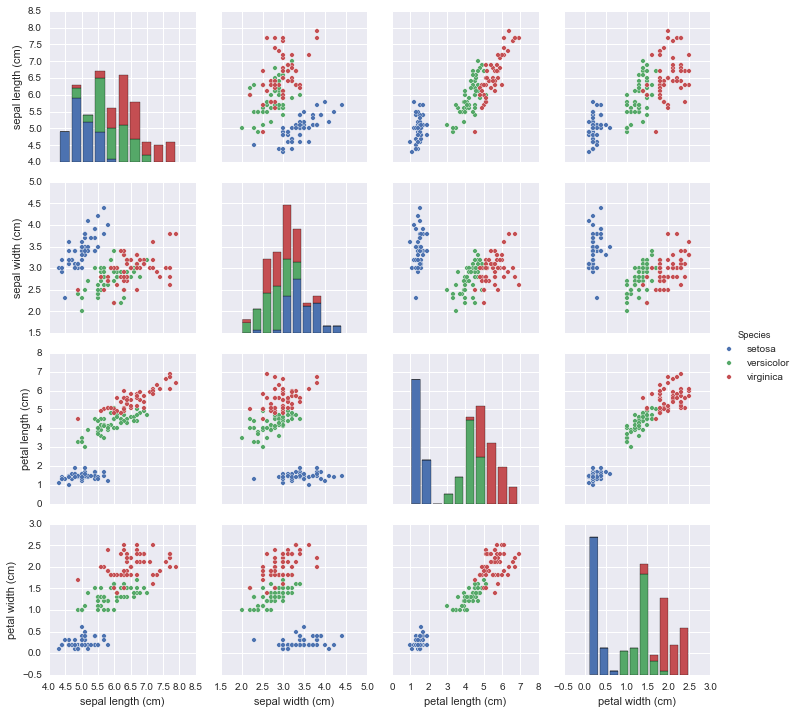

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris_df['Species'] = Y_iris
iris_df['Species'] = iris_df['Species'].replace([0,1,2], y_name)
iris_df.head()
sns.pairplot(iris_df, vars = x_names, hue = 'Species')
plt.show()

From the pairplot, we may tell that petal length and petal width are better predictors than sepal length and sepal width.

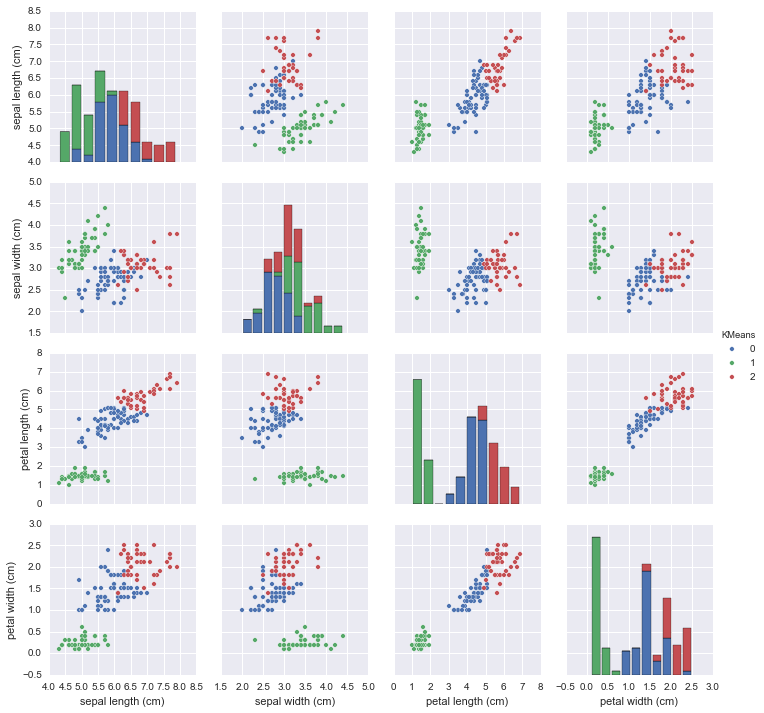

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_iris)
labels = model.predict(X_iris)
iris_df['KMeans'] = labels
sns.pairplot(iris_df, vars = x_names, hue = 'KMeans')
plt.show()

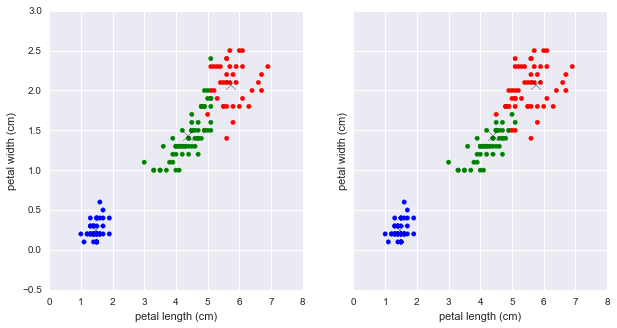

In [26]:
centroids = model.cluster_centers_
kc = {0:'green', 1:'blue', 2:'red'}
sc = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (10, 5))
ax1.scatter(x = x_names[2], y = x_names[3], data = iris_df, color = iris_df['KMeans'].apply(lambda x: kc[x]))
ax1.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=100, c = 'k')
ax1.set_xlabel(x_names[2])
ax1.set_ylabel(x_names[3])
ax2.scatter(x = x_names[2], y = x_names[3], data = iris_df, color = iris_df['Species'].apply(lambda x: sc[x]))
ax2.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=100, c = 'k')
plt.xlabel(x_names[2])
plt.ylabel(x_names[3])
plt.show()

In [48]:
ct = pd.crosstab(iris_df['Species'], iris_df['KMeans'])
print ct

KMeans       0   1   2
Species               
setosa      50   0   0
versicolor   0  48   2
virginica    0  14  36


In [67]:
from __future__ import division
error_rate = 1 - sum(ct.max(axis = 1)) / iris_df.shape[0]
print 'The error rate of KMeans method on iris data is %0.2f%%.' % error_rate

The error rate of KMeans method on iris data is 0.11%.
